Find the best model to predict the price of the mobile phone using the given 
dataset. Mention which model gives the best result in your file and justify your 
answer 

In [ ]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset mobile_price.csv

In [ ]:
data=pd.read_csv('/content/mobile_price.csv')

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Attributes present in the dataset
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.shape

(2000, 21)

In [ ]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

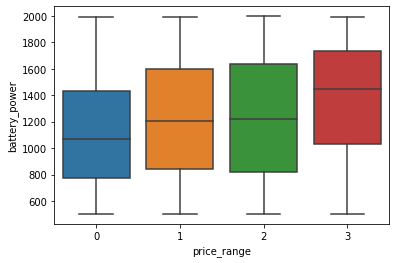

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=data)

Text(0.5, 1.0, 'Price of mobile phone Vs Clock_speed ')

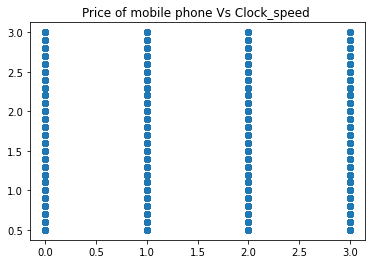

In [ ]:
plt.scatter(data.price_range,data.clock_speed)
plt.title("Price of mobile phone Vs Clock_speed ")

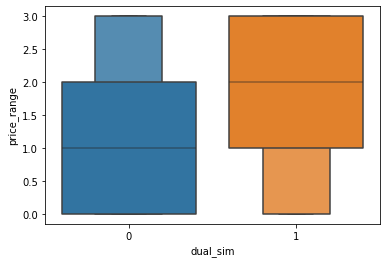

In [ ]:
sns.boxenplot(x="dual_sim",y="price_range",data=data)
#sns.boxplot


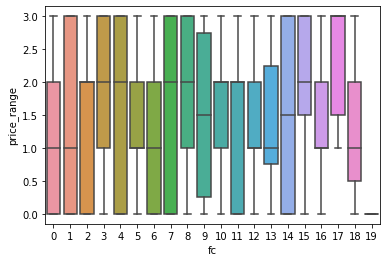

In [ ]:
#plt.scatter(data.dual_sim,data.price_range)
sns.boxplot(x="fc",y="price_range",data=data)

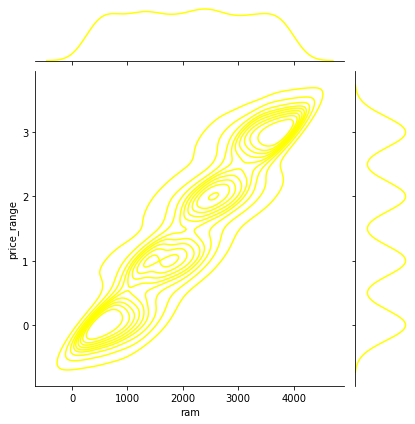

In [ ]:
sns.jointplot(x="ram",y="price_range",data=data,color='Yellow',kind='kde')

In [ ]:
#sns.pairplot(data)
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Text(0.5, 1.0, 'FC')

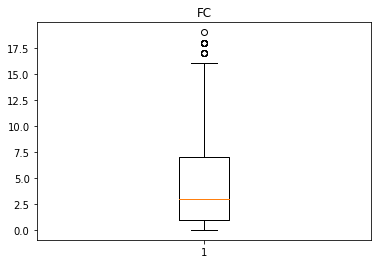

In [ ]:
plt.boxplot(data['fc'])
plt.title('FC')

In [ ]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [ ]:
Q1=np.percentile(data['fc'],25,interpolation='midpoint')
Q2=np.percentile(data['fc'],50,interpolation='midpoint')
Q3=np.percentile(data['fc'],75,interpolation='midpoint')

data['fc'].median()
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(lower_limit)
print(Upper_limit)

-8.0
16.0


In [ ]:
index=data[(data['fc']>=Upper_limit)].index
index
data.drop(index,inplace=True)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,1237.478039,0.495914,1.519050,0.509193,4.042901,0.519918,32.106742,0.503013,140.194076,4.523493,9.728294,642.902962,1250.992850,2127.783453,12.319714,5.792646,11.006639,0.759959,0.503064,0.502043,1.501021
std,439.358223,0.500111,0.815749,0.500043,3.980946,0.499731,18.143564,0.288364,35.401632,2.287289,5.987103,441.689926,431.858891,1084.715829,4.206588,4.362228,5.457267,0.427217,0.500118,0.500124,1.119689
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,4.000000,282.000000,874.250000,1213.250000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1614.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,943.500000,1630.000000,3067.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,15.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#correlation matrix

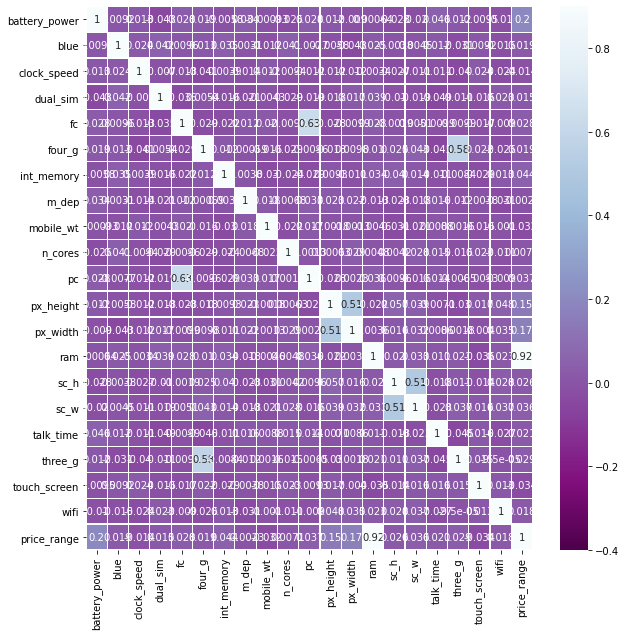

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='BuPu_r')

In [ ]:
#no categorical data shown in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1958 non-null   int64  
 1   blue           1958 non-null   int64  
 2   clock_speed    1958 non-null   float64
 3   dual_sim       1958 non-null   int64  
 4   fc             1958 non-null   int64  
 5   four_g         1958 non-null   int64  
 6   int_memory     1958 non-null   int64  
 7   m_dep          1958 non-null   float64
 8   mobile_wt      1958 non-null   int64  
 9   n_cores        1958 non-null   int64  
 10  pc             1958 non-null   int64  
 11  px_height      1958 non-null   int64  
 12  px_width       1958 non-null   int64  
 13  ram            1958 non-null   int64  
 14  sc_h           1958 non-null   int64  
 15  sc_w           1958 non-null   int64  
 16  talk_time      1958 non-null   int64  
 17  three_g        1958 non-null   int64  
 18  touch_sc

In [ ]:
data.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0               842     0          2.2  ...             0     1            1
1              1021     1          0.5  ...             1     0            2
2               563     1          0.5  ...             1     0            2
3               615     1          2.5  ...             0     0            2
4              1821     1          1.2  ...             1     0            1
...             ...   ...          ...  ...           ...   ...          ...
1995            794     1          0.5  ...             1     0            0
1996           1965     1          2.6  ...             1     1            2
1997           1911     0          0.9  ...             1     0            3
1998           1512     0          0.9  ...             1     1            0
1999            510     1          2.0  ...             1     1            3

[1958 rows x 21 columns]>

In [ ]:
Y=data['price_range']
X=data.drop('price_range',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)
#from sklearn import linear_model
#lr=linear_model.LinearRegression()
#model=lr.fit(X_train,Y_train)
#predictions=model.predict(X_test)


In [ ]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,1237.478039,0.495914,1.519050,0.509193,4.042901,0.519918,32.106742,0.503013,140.194076,4.523493,9.728294,642.902962,1250.992850,2127.783453,12.319714,5.792646,11.006639,0.759959,0.503064,0.502043
std,439.358223,0.500111,0.815749,0.500043,3.980946,0.499731,18.143564,0.288364,35.401632,2.287289,5.987103,441.689926,431.858891,1084.715829,4.206588,4.362228,5.457267,0.427217,0.500118,0.500124
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,4.000000,282.000000,874.250000,1213.250000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1614.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,943.500000,1630.000000,3067.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,15.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1079,1893,1,0.5,1,1,0,23,0.1,179,8,3,1203,1432,1482,15,7,17,0,1,0
869,1236,1,2.8,0,6,1,32,0.3,143,4,18,492,1403,942,16,12,14,1,1,1
161,961,1,1.5,1,10,0,51,0.3,152,6,16,554,621,2981,15,6,7,1,1,1
1029,1658,1,1.4,1,0,1,38,0.3,159,5,0,51,739,2609,12,11,19,1,0,0
1002,511,1,0.6,1,12,0,50,0.1,175,3,16,140,622,1484,9,7,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,1640,0,0.5,1,1,1,36,0.9,87,8,11,664,1806,3235,6,1,10,1,0,1
1642,936,0,0.5,1,14,1,14,0.1,164,3,17,150,1677,3761,13,1,12,1,0,0
510,687,1,1.3,0,9,1,50,0.6,151,4,20,584,1151,3416,14,6,8,1,1,0
544,707,0,0.5,0,0,1,16,0.1,194,2,0,1027,1508,1853,17,14,12,1,1,1


In [ ]:
Y_train

1079    2
869     0
161     2
1029    2
1002    0
       ..
1590    3
1642    3
510     3
544     1
1217    3
Name: price_range, Length: 1566, dtype: int64

In [ ]:
X_train.shape

(1566, 20)

In [ ]:
Y_train.shape

(1566,)

In [ ]:
X_test.shape

(392, 20)

In [ ]:
Y_test.shape

(392,)

In [ ]:
#Feature SCaling

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,1237.478039,0.495914,1.519050,0.509193,4.042901,0.519918,32.106742,0.503013,140.194076,4.523493,9.728294,642.902962,1250.992850,2127.783453,12.319714,5.792646,11.006639,0.759959,0.503064,0.502043,1.501021
std,439.358223,0.500111,0.815749,0.500043,3.980946,0.499731,18.143564,0.288364,35.401632,2.287289,5.987103,441.689926,431.858891,1084.715829,4.206588,4.362228,5.457267,0.427217,0.500118,0.500124,1.119689
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,4.000000,282.000000,874.250000,1213.250000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1614.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,943.500000,1630.000000,3067.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,15.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# **SCALING**

In [ ]:
from sklearn import preprocessing
standard=preprocessing.StandardScaler()
X=standard.fit_transform(X)

# **MIN_MAX Scaling and normalization used**

In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
standardisation=preprocessing.StandardScaler()
X=standardisation.fit_transform(X)
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()
X=preprocessing.normalize(X)


Check the Feature importance of Each attribute

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,Y)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.04444621 0.00956771 0.00609981 0.00738408 0.00486196 0.01157035
 0.00562957 0.00620951 0.00691506 0.00574121 0.00548197 0.01997526
 0.02415789 0.78743605 0.00679017 0.00495663 0.0061542  0.01706345
 0.00959366 0.00996525]


In [ ]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

**RANDOM FOREST MODEL-Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)


In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

print("Accuracy Score is",accuracy_score(Y_test,Y_pred))
print("precision_score",precision_score(Y_test,Y_pred,average='micro'))
print("recall_score",recall_score(Y_test,Y_pred,average='micro'))
print("F1-Score is",f1_score(Y_test,Y_pred,average='micro'))

In [ ]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

In [ ]:
confusion_matrix(Y_test,Y_pred)

In [ ]:
rf.fit(X_train,Y_train)

In [ ]:
rft=RandomForestClassifier(n_estimators=500,max_features='auto', max_depth=12,min_samples_split=2, random_state=30,criterion="entropy")
rft.fit(X_train,Y_train)

In [ ]:
Y_pred=rft.predict(X_test)
f1_score(Y_test,Y_pred,average='micro')
print("Accuracy Score is",accuracy_score(Y_test,Y_pred))


Accuracy obtained by using Random Forest Classifier-86%

# **Support Vector Machine Classifier**


In [ ]:
from sklearn.svm import SVC
svcclass=SVC(kernel='linear')
svcclass.fit(X_train,Y_train)
Y_pred=svcclass.predict(X_test)

In [ ]:
print("Accuracy Score is",accuracy_score(Y_test,Y_pred))
print("precision_score",precision_score(Y_test,Y_pred,average='micro'))
print("recall_score",recall_score(Y_test,Y_pred,average='micro'))
print("F1-Score is",f1_score(Y_test,Y_pred,average='micro'))

Accuracy attained-95%

# **KNN-Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

In [ ]:
print("Accuracy Score is",accuracy_score(Y_test,Y_pred))
print("precision_score",precision_score(Y_test,Y_pred,average='micro'))
print("recall_score",recall_score(Y_test,Y_pred,average='micro'))
print("F1-Score is",f1_score(Y_test,Y_pred,average='micro'))

Accuracy attained by using KNN is-92%

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtree.fit(X_train,Y_train)
Y_pred=dtree.predict(X_test)
print("Accuracy Score is",accuracy_score(Y_test,Y_pred))
print("precision_score",precision_score(Y_test,Y_pred,average='micro'))
print("recall_score",recall_score(Y_test,Y_pred,average='micro'))
print("F1-Score is",f1_score(Y_test,Y_pred,average='micro'))

confusion_matrix(Y_test,Y_pred)

In [ ]:
#SVM-is the best model to predict the price of the mobile phone